Roll Number - **CB.EN.U4CSE20202**

Name - **Abirami S**

In [105]:
import pandas as pd
import numpy as np 
import array
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [106]:
baby = pd.read_csv('test.csv')
baby

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [107]:
Age_and_smoking = baby[['Maternal Smoker', 'Maternal Age']]
Age_and_smoking

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [108]:
smoker = Age_and_smoking['Maternal Age'] [Age_and_smoking['Maternal Smoker'] == True]
non_smoker = Age_and_smoking['Maternal Age'] [Age_and_smoking['Maternal Smoker'] == False]

In [109]:
#Age_and_smoking.hist(by ='Maternal Smoker')

## Question 1

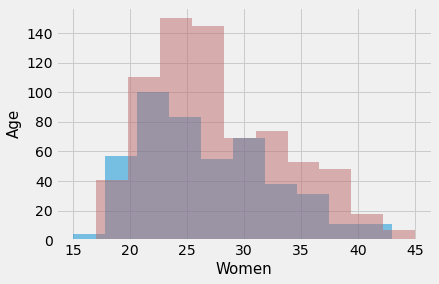

In [110]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5)   
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75))
plt.xlabel('Women',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

In [111]:
print('Non-Smoker Skewness: ',non_smoker.skew())
print('Smoker Skewness: ',smoker.skew())


Smoker Skewness:  0.5872488858936287
Smoker Skewness:  0.6150457477108131


#### Note
- **From the skewness values smoker are more inclined to the left**

In [114]:
print('Smoker mean: ',smoker.mean())
print('Non-Smoker mean: ',non_smoker.mean())


Smoker mean:  26.736383442265794
Non-Smoker mean:  27.544055944055945


## Question 2

In [52]:
means_table = Age_and_smoking.groupby('Maternal Smoker').mean()
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [115]:
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

### Statistical data 
- Average age of smokers are less than average age of non smokers
- i.e mean(smokers)< mean(smokers)
- **Random permutation test can be performed**

## Question 3 


**NULL HYPOTHESIS**
- The average mean of age of smokers is not less than average mean of age of non smokers 

**ALTERNATE HYPOTHESIS**
- The average mean of age of smokers is less than average mean of age of non smokers 

In [116]:
Age_and_smoking

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


## Question 4

- Calculate the mean differences of the permutation test and compare it with the observed given mean difference 
- Hance with this data we can conclude wether it favours null or alternate hypothesis

## Question 5

In [117]:
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

In [118]:
shuffled = Age_and_smoking.sample(1174,replace = False)
shuffled

,Maternal Smoker,Maternal Age
42,True,27
1014,True,41
136,False,24
1171,True,30
1070,False,40
...,...,...
316,True,30
1120,True,31
1017,False,34
654,False,23


In [119]:
shuffled_age = shuffled['Maternal Age']

In [120]:
original_and_shuffled= Age_and_smoking.assign(shuffled_age=shuffled_age.values )
original_and_shuffled

,Maternal Smoker,Maternal Age,shuffled_age
0,False,27,27
1,False,33,41
2,True,28,24
3,True,23,30
4,False,25,40
...,...,...,...
1169,False,27,30
1170,False,24,31
1171,True,30,34
1172,False,21,23


In [121]:
shuffled_means_table = original_and_shuffled.groupby('Maternal Smoker').mean()
shuffled_means_table

,Maternal Age,shuffled_age
Maternal Smoker,,
False,27.544056,27.005594
True,26.736383,27.575163


In [122]:
shuffled_difference = shuffled_means_table['shuffled_age'][1] - shuffled_means_table['shuffled_age'][0]
shuffled_difference

0.5695689930984074

## Question 6

In [123]:
differences = np.zeros(5000)

In [124]:
for i in np.arange(5000):
    Age_and_smoking = baby[['Maternal Smoker', 'Maternal Age']]
    shuffled = Age_and_smoking.sample(1174,replace = False)
    shuffled_age = shuffled['Maternal Age']
    original_and_shuffled = Age_and_smoking.assign(shuffled_age=shuffled_age.values )
    shuffled_means_table= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = shuffled_means_table['shuffled_age'][0]- shuffled_means_table['shuffled_age'][1]
    differences[i] = difference

In [125]:
differences

array([ 0.21027165, -0.16176242, -0.44794247, ...,  0.2210034 ,
        0.51433795,  0.01352286])

In [126]:
diff_df = pd.DataFrame(differences)
diff_df

,0
0,0.210272
1,-0.161762
2,-0.447942
3,0.120840
4,-0.340625
...,...
4995,-0.075908
4996,0.034986
4997,0.221003
4998,0.514338


## Question 7

Observed Difference: -0.8076725017901509


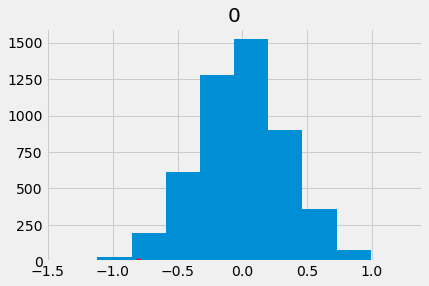

In [127]:
diff_df.hist(bins = 10)
plt.scatter(observed_difference, 0, color='red', s=30)
print('Observed Difference:', observed_difference)

## Question 8

In [128]:
p = np.count_nonzero(differences <= observed_difference)/differences.size
p

0.0102

In [130]:
print('Ob Diff', observed_difference)
print('P-value:', round(p, 2) *100, '%')

Ob Diff -0.8076725017901509
P-value: 1.0 %


## Question 9

- Since the observed p value is so small = 0.0106 (given alpha value = **0.05**) and the observed difference in the histogram under null hypothesis is in the tail. 
- the test favour alternative hypothesis more than null 
- i.e the average age of smokers is less than average age of non smokers 